In [1]:
#importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Given data

In [4]:
data = pd.read_csv('givendata.csv')
data.head(8)

,X,Y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [3]:
data.shape

(8, 2)

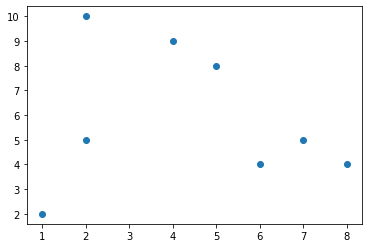

In [6]:
plt.scatter(data.X, data.Y);

In [7]:
#innitial centers - 

a = [2,10]
b = [5,8]
c = [1,2]

In [8]:
#finding euclidean distance between each to find new cluster centers for the first iteration

def kmean_calculation(data,a,b,c):
    c1 = []
    c2 = []
    c3 = []

    for i in range(8):
        dist1 = np.sqrt((a[0] - data.X[i])**2 + (a[1] - data.Y[i])**2)
        dist2 = np.sqrt((b[0] - data.X[i])**2 + (b[1] - data.Y[i])**2)
        dist3 = np.sqrt((c[0] - data.X[i])**2 + (c[1] - data.Y[i])**2)
        minDist = min(dist1, min(dist2,dist3))
        l = []
        if minDist == dist1:
            l.append(data.X[i])
            l.append(data.Y[i])
            c1.append(l)
        elif minDist == dist2:
            l.append(data.X[i])
            l.append(data.Y[i])
            c2.append(l)
        else:
            l.append(data.X[i])
            l.append(data.Y[i])
            c3.append(l)
            
    return c1,c2,c3

In [10]:
#finding new cluster centers -

def new_centers(c1,c2,c3):
    x_val = []
    y_val = []
    a = []
    for i in c1:
        x_val.append(i[0])
        y_val.append(i[1])
    a.append(np.mean(x_val))
    a.append(np.mean(y_val))

    print("New center 1",a)

    x_val = []
    y_val = []
    b = []
    for i in c2:
        x_val.append(i[0])
        y_val.append(i[1])
    b.append(np.mean(x_val))
    b.append(np.mean(y_val))

    print("New center 2",b)

    x_val = []
    y_val = []
    c = []
    for i in c3:
        x_val.append(i[0])
        y_val.append(i[1])
    c.append(np.mean(x_val))
    c.append(np.mean(y_val))

    print("New center 3",c)
    
    return a,b,c

In [9]:
#first iteration

c1,c2,c3 = kmean_calculation(data,a,b,c)
print("After first iteration the clusters are as follows:\n")
print("Cluster 1:",c1)
print("Cluster 2:",c2)
print("Clsuter 3:",c3)

After first iteration the clusters are as follows:

Cluster 1: [[2, 10]]
Cluster 2: [[8, 4], [5, 8], [7, 5], [6, 4], [4, 9]]
Clsuter 3: [[2, 5], [1, 2]]


In [12]:
#next iterations

prevc1 = c1
prevc2 = c2
prevc3 = c3

for i in range(4):
    print("\n---------------------------------------------------------\n")
    print("\nAfter",i+2," iteration the clusters are as follows:\n")
    a,b,c = new_centers(c1,c2,c3)

    c1,c2,c3 = kmean_calculation(data,a,b,c)
    
    print("\nCluster 1:",c1)
    print("Cluster 2:",c2)
    print("Clsuter 3:",c3)
    
    if c1 == prevc1 and prevc2 == c2 and prevc3 == c3:
        break
    prevc1 = c1
    prevc2 = c2
    prevc3 = c3


---------------------------------------------------------


After 2  iteration the clusters are as follows:

New center 1 [3.6666666666666665, 9.0]
New center 2 [7.0, 4.333333333333333]
New center 3 [1.5, 3.5]

Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Clsuter 3: [[2, 5], [1, 2]]


## Using Sklearn

In [13]:
datadf = pd.read_csv('Mall_Customers.csv')
datadf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
datadf.shape

(200, 5)

In [15]:
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= datadf.iloc[:, [3,4]].values

In [16]:
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [18]:
#Getting the Centroids
#getting uniquie labels

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

print(u_labels)

[0 1 2 3 4]


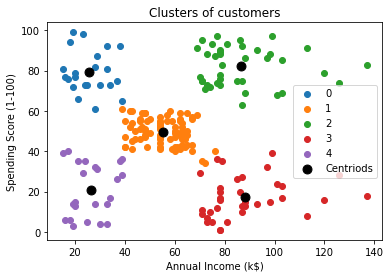

In [19]:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', label = 'Centriods')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()